In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DataSets/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,export_text,export_graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pydotplus
from IPython.display import Image
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
read_data = pd.read_csv('iris.csv')
read_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


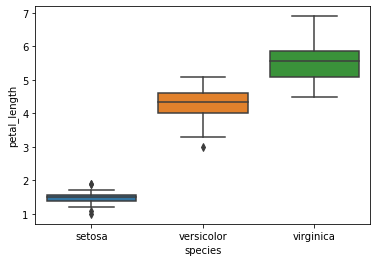

In [ ]:
sns.boxplot(x="species",y="petal_length",data=read_data);

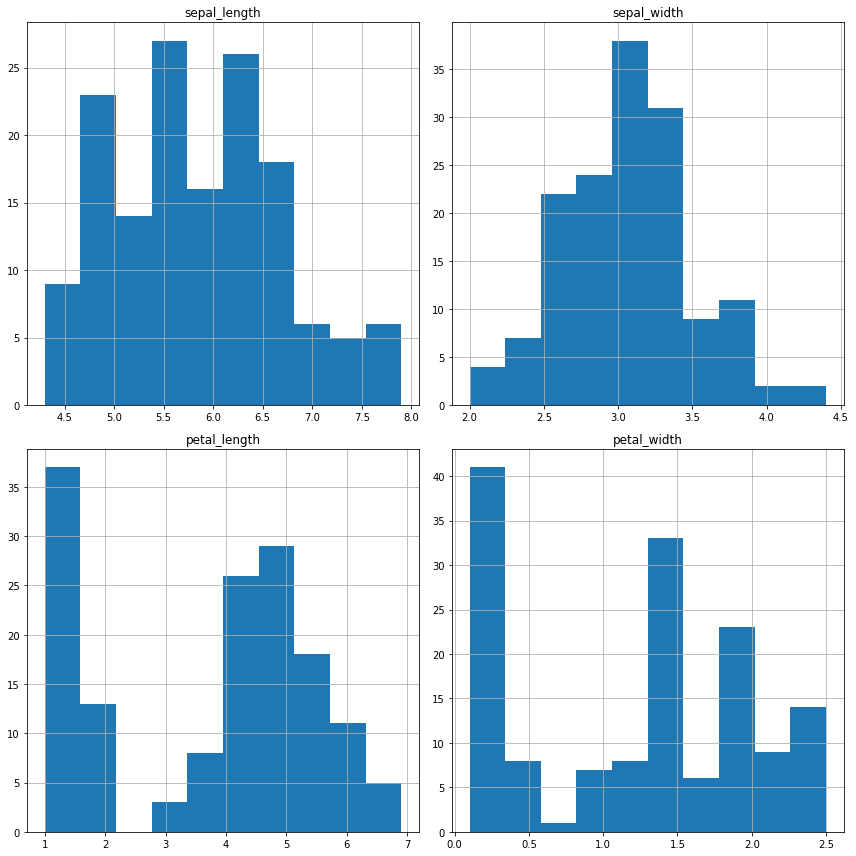

In [ ]:
read_data.hist(column=read_data.columns[:4], figsize=(12,12));

plt.tight_layout();

In [ ]:
#Retriving attributes(X) and target values(Y)
dataSet = read_data
prePoc = False
name = 'Iris'
X = dataSet.values[:,:-1]
Y = dataSet.values[:,-1]
print(f"The observation of X:{X.shape}")
classlabel = np.unique(Y)
print(f"The observation of Y:{Y.shape}")
print(f"The classlabels are:{classlabel}")
col = dataSet.keys()
col = list(col)
col.pop()
col

The observation of X:(150, 4)
The observation of Y:(150,)
The classlabels are:['setosa' 'versicolor' 'virginica']


['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

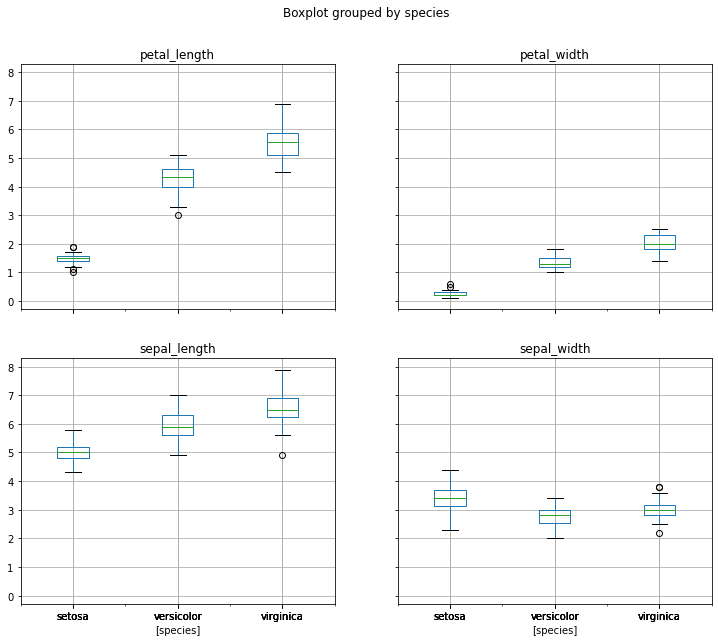

In [ ]:
dataSet.boxplot(by="species", figsize=(12, 10));

PREPROCESSING :

In [ ]:
def delDup(dataframe, mode):
    mode = str(mode)
    if mode == 'show':
        dups = dataframe.duplicated(keep='first')
        if dups.any() == True:
            return (dataframe[dups])
        else:
            print("No duplicates found!")
    elif mode == 'del':
        dataframe = dataframe.drop_duplicates()
        return dataframe
  
print("Dataset shape before duplication removing:")
print(dataSet.shape)
print('\n')
print("Duplicate rows:")
d = delDup(dataSet, 'show')
print(d)
print('\n')
print("Dataset shape after duplication removing:")
dataSet = delDup(dataSet,'del')
print(dataSet.shape)
#dataSet


Dataset shape before duplication removing:
(150, 5)


Duplicate rows:
     sepal_length  sepal_width  petal_length  petal_width    species
34            4.9          3.1           1.5          0.1     setosa
37            4.9          3.1           1.5          0.1     setosa
142           5.8          2.7           5.1          1.9  virginica


Dataset shape after duplication removing:
(147, 5)


In [ ]:
if prePoc==True:
  XScaled = preprocessing.scale(X)
else:
   XScaled=X


iris_preproc = pd.DataFrame(XScaled,columns=col)
iris_preproc = delDup(iris_preproc,'del')
iris_preproc

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3,5.2,2.3
146,6.3,2.5,5,1.9
147,6.5,3,5.2,2
148,6.2,3.4,5.4,2.3


In [ ]:
mean_sepallength = iris_preproc['sepal_length'].mean()
std_sepallength = iris_preproc['sepal_length'].std()
print(f"The mean of sepal length is:{int(mean_sepallength)} and the standrard deviation is:{int(std_sepallength)}")
print("-----------------------------------------------------")
mean_sepalwidth = iris_preproc['sepal_width'].mean()
std_sepalwidth = iris_preproc['sepal_width'].std()
print(f"The mean od sepal width is:{int(mean_sepalwidth)} and the standrard deviation is :{int(std_sepalwidth)}")
print("-----------------------------------------------------")
mean_petallength = iris_preproc['petal_length'].mean()
std_petallength = iris_preproc['petal_length'].std()
print(f"The mean of petal length is:{int(mean_petallength)} and the standrard deviation is :{int(std_petallength)}")
print("-----------------------------------------------------")
mean_petalwidth = iris_preproc['petal_width'].mean()
std_petalwidth = iris_preproc['petal_width'].std()
print(f"The mean of petal width is:{int(mean_petalwidth)} and the standrard deviation is:{int(std_petalwidth)}")

The mean of sepal length is:5 and the standrard deviation is:0
-----------------------------------------------------
The mean od sepal width is:3 and the standrard deviation is :0
-----------------------------------------------------
The mean of petal length is:3 and the standrard deviation is :1
-----------------------------------------------------
The mean of petal width is:1 and the standrard deviation is:0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


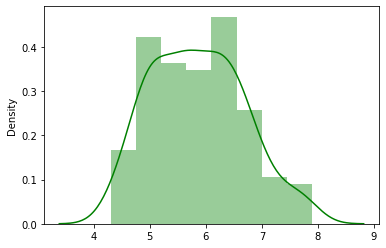

In [ ]:
sns.distplot(iris_preproc[['sepal_length']],color ='green');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


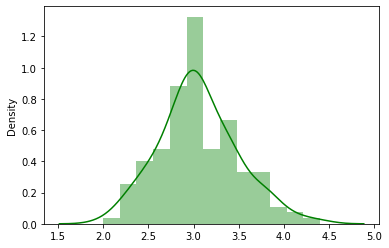

In [ ]:
sns.distplot(iris_preproc[['sepal_width']],color ='green');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


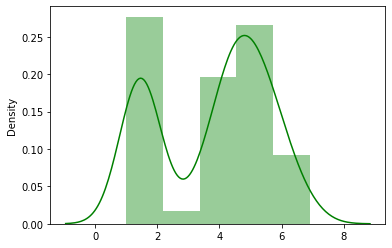

In [ ]:
sns.distplot(iris_preproc[['petal_length']],color ='green');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


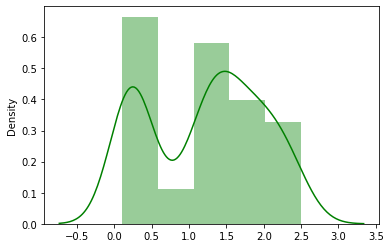

In [ ]:
sns.distplot(iris_preproc[['petal_width']],color ='green');

SPLITTING INTO TRAINING AND TEST DATASET :

In [ ]:
splitratio = 0.33
X_train,X_test,Y_train,Y_test = train_test_split(XScaled,Y,test_size=splitratio)
print('Training dataset')
print(X_train.shape)
print(Y_train.shape)
print('Testing dataset')
print(X_test.shape)
print(Y_test.shape)

Training dataset
(100, 4)
(100,)
Testing dataset
(50, 4)
(50,)


In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train,Y_train)


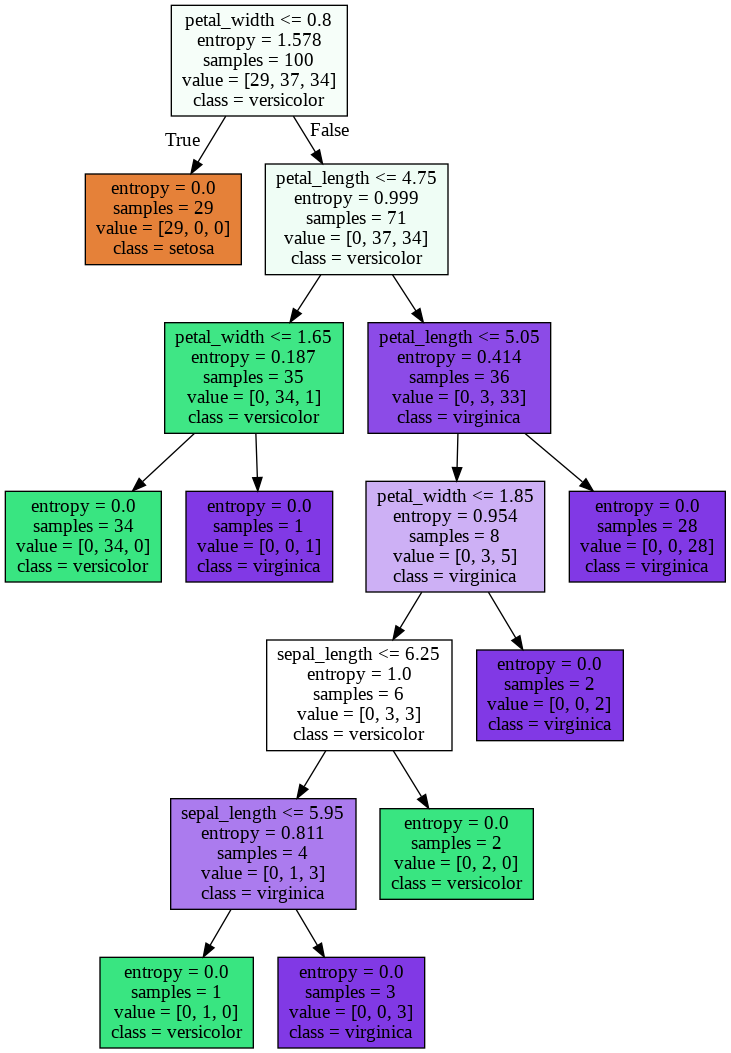

In [ ]:
dot_data = export_graphviz(clf,feature_names=dataSet.columns[:-1],class_names=classlabel,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

TESTING THE MODEL :

In [ ]:
Y_pred = clf.predict(X_test)
print('Accuracy')
print(accuracy_score(Y_test,Y_pred))
print('Confusion Matrix')
conf = confusion_matrix(Y_test,Y_pred)
print(conf)

Accuracy
0.96
Confusion Matrix
[[21  0  0]
 [ 0 12  1]
 [ 0  1 15]]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9cf0f0950>)

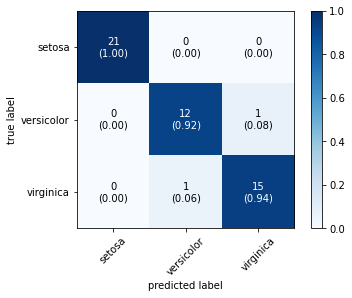

In [ ]:
plot_confusion_matrix(conf_mat=conf, colorbar=True, show_absolute=True, show_normed=True, class_names=classlabel)


In [ ]:
clf_report = classification_report(Y_test,Y_pred,target_names=classlabel,digits=5,output_dict=True)
print(clf_report)

{'setosa': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 21}, 'versicolor': {'precision': 0.9230769230769231, 'recall': 0.9230769230769231, 'f1-score': 0.9230769230769231, 'support': 13}, 'virginica': {'precision': 0.9375, 'recall': 0.9375, 'f1-score': 0.9375, 'support': 16}, 'accuracy': 0.96, 'macro avg': {'precision': 0.9535256410256411, 'recall': 0.9535256410256411, 'f1-score': 0.9535256410256411, 'support': 50}, 'weighted avg': {'precision': 0.96, 'recall': 0.96, 'f1-score': 0.96, 'support': 50}}


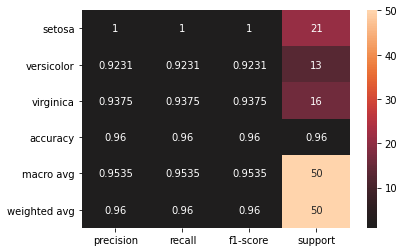

In [ ]:
sns.heatmap(pd.DataFrame(clf_report).T, annot=True, fmt='.4g', center=True);

RANDOM SAMPLING :

In [ ]:
splitratio = 0.33
ntimes = 10
acc = []
for  i in range(ntimes):
    X_train,X_test,Y_train,Y_test = train_test_split(XScaled,Y,test_size=splitratio)
    clf = DecisionTreeClassifier(criterion="entropy")
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    acc.append(accuracy_score(Y_test,Y_pred))

print(sum(acc)/ntimes)

0.958


K-FOLD

In [ ]:
k =10
scores = cross_val_score(DecisionTreeClassifier(),XScaled,Y,cv=k)
print(scores,'\n')
print(scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ] 

0.96
